In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from aqosd_experiments.config import FIG_PATH

warnings.filterwarnings("ignore")
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])

In [2]:
df = pd.read_csv('C:/Users/couedrao/Downloads/Taxi_Trips.csv')
df['Trip Start Timestamp']= pd.to_datetime(df['Trip Start Timestamp'])
df['Trip End Timestamp']= pd.to_datetime(df['Trip End Timestamp'])
print('min = ', min(df['Trip Start Timestamp']),'max = ', max(df['Trip Start Timestamp']))
df.info()

min =  2014-06-15 11:00:00 max =  2017-03-30 21:30:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652167 entries, 0 to 652166
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     652167 non-null  object        
 1   Taxi ID                     652163 non-null  object        
 2   Trip Start Timestamp        652163 non-null  datetime64[ns]
 3   Trip End Timestamp          652163 non-null  datetime64[ns]
 4   Trip Seconds                652156 non-null  object        
 5   Trip Miles                  652156 non-null  float64       
 6   Pickup Census Tract         485627 non-null  float64       
 7   Dropoff Census Tract        481761 non-null  float64       
 8   Pickup Community Area       645118 non-null  float64       
 9   Dropoff Community Area      630103 non-null  float64       
 10  Fare                        652157 non-null  objec

In [3]:
start, stop ='2017-02-01 12:00:00', '2017-02-07 12:00:00'
df0 = df[(df['Trip Start Timestamp'] > start) & (df['Trip Start Timestamp'] <= stop)]
df0 = df0[['Trip ID', 'Trip Start Timestamp']].copy()
df0['Day'] = df0['Trip Start Timestamp'].dt.day_name()
df0.index = df0['Trip Start Timestamp']
df0.loc[df0['Day'] == 'Monday']

,Trip ID,Trip Start Timestamp,Day
Trip Start Timestamp,,,
2017-02-06 08:15:00,5cb0e3822b9e2fb995402b8c892eeff1c1df527b,2017-02-06 08:15:00,Monday
2017-02-06 21:45:00,542fd7c00198ada91bbbb970b93c39bcb44d0aa9,2017-02-06 21:45:00,Monday
2017-02-06 11:45:00,239ebabfb13eb5a317092b4d811fdc1a1faaffd5,2017-02-06 11:45:00,Monday
2017-02-06 14:15:00,f01c0526c24df13c967e45fc19c416d19ef36215,2017-02-06 14:15:00,Monday
2017-02-06 09:30:00,59eceed610186094a892ff3fb46ccd6ac3541e3e,2017-02-06 09:30:00,Monday
...,...,...,...
2017-02-06 16:45:00,fe79e2c08c1aea58e0ff3447053bd1323bbefdcf,2017-02-06 16:45:00,Monday
2017-02-06 17:30:00,db528aa9a464140fd6dda9c569b8cdc9729b2888,2017-02-06 17:30:00,Monday
2017-02-06 18:00:00,4a904fa9947c94ad5af09acea21b858ad884a4ba,2017-02-06 18:00:00,Monday


In [4]:
#df0 = df0.loc[df0['Day'].isin(['Monday','Saturday'])]
df0 = df0.groupby([df0['Trip Start Timestamp'].dt.hour, 'Day'])['Trip ID'].count().unstack()
df0

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Trip Start Timestamp,,,,,,,
0,518.0,405.0,1096.0,1244.0,288.0,256.0,NaN
1,307.0,310.0,1166.0,1321.0,234.0,205.0,NaN
2,237.0,255.0,924.0,1134.0,129.0,121.0,NaN
3,211.0,208.0,631.0,780.0,153.0,135.0,NaN
4,160.0,205.0,271.0,538.0,145.0,141.0,NaN
5,215.0,348.0,157.0,267.0,217.0,268.0,NaN
6,578.0,602.0,193.0,208.0,565.0,619.0,NaN
7,1156.0,1126.0,273.0,204.0,1336.0,1483.0,NaN
8,1737.0,1684.0,405.0,282.0,2083.0,1940.0,NaN


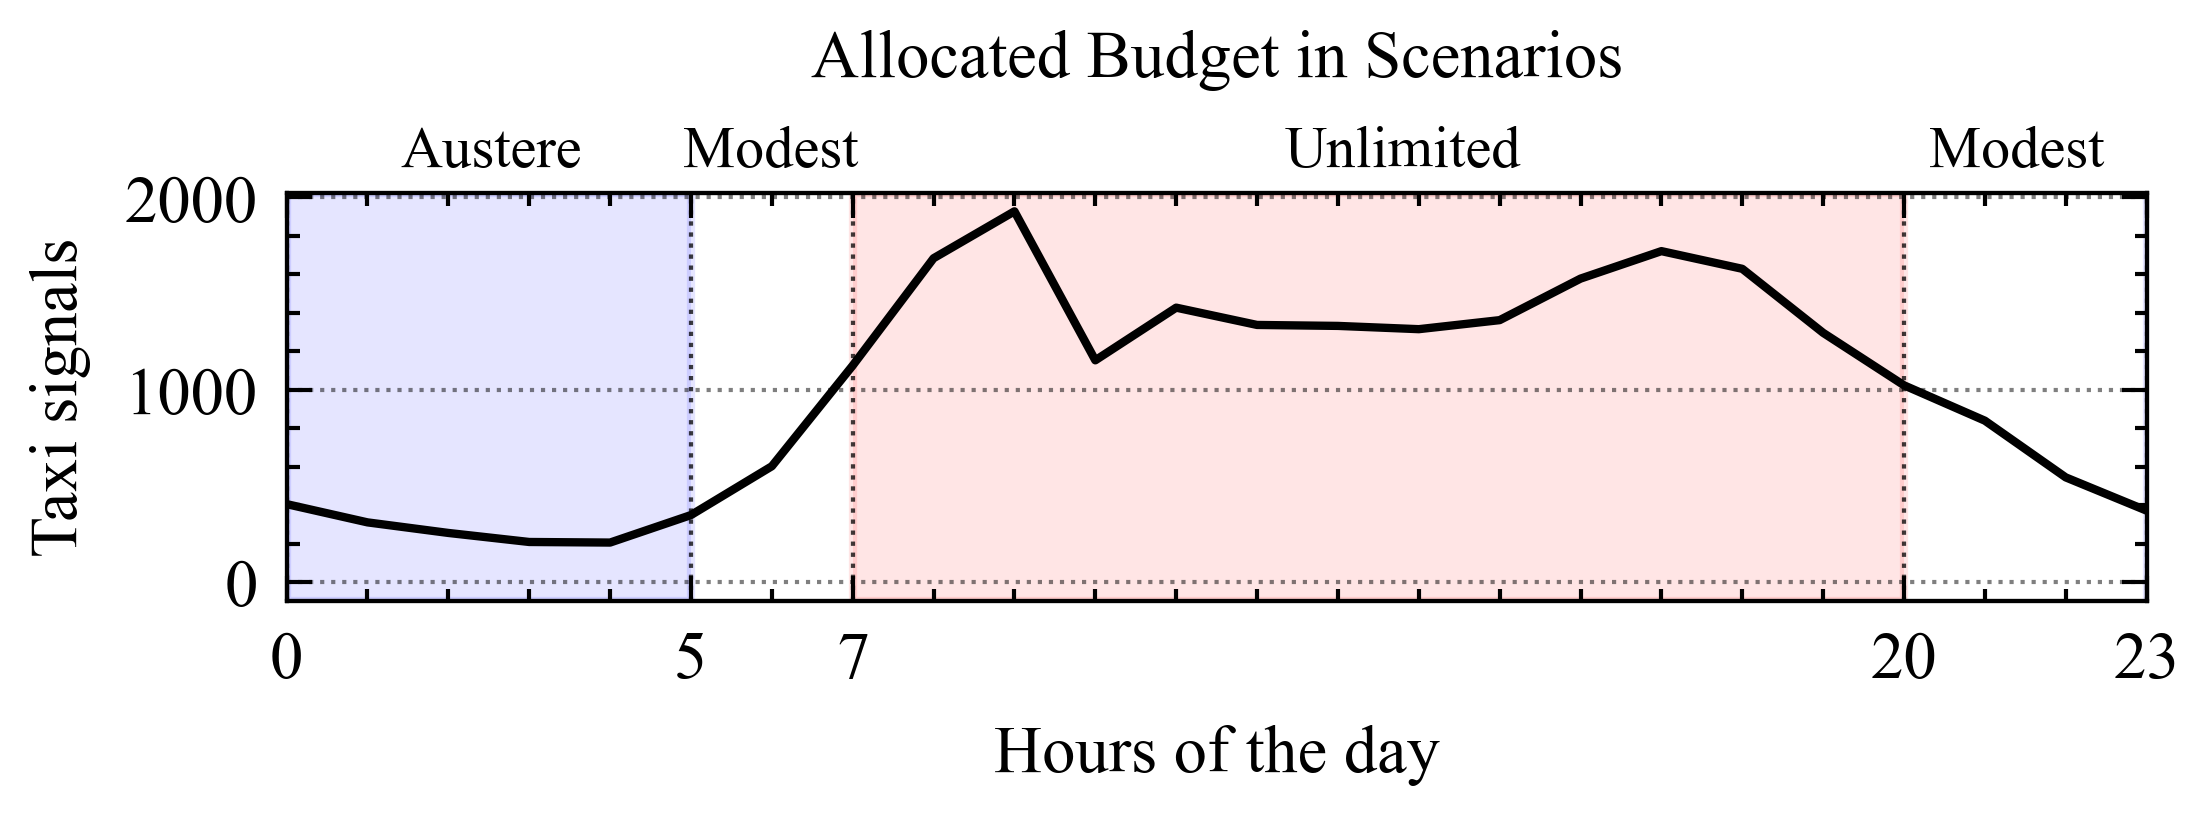

In [11]:
scn=['Unlimited','Austere', 'Modest']
thresholds = [1000, 500]
ft=7
ss=1.1

fig, ax = plt.subplots(figsize=(4,.9))
x = df0.index
y = df0['Monday']
ax.fill_between(x, 0, 1, where=y > thresholds[0], color='r', alpha=.1, transform=ax.get_xaxis_transform())
ax.fill_between(x, 0, 1, where=y <= thresholds[1], color='b', alpha=.1, transform=ax.get_xaxis_transform())
#ax.axhline(thresholds[1], color='g', lw=.5, alpha=0.7)
ax.set_xlabel("Hours of the day"), ax.set_ylabel("Taxi signals")
ax.set_xticks([0,5,7,20,23]), ax.xaxis.set_ticklabels(['0','5','7','20','23'])
ax.set_xlim(0,23)
ax2 = ax.twiny()
ax2.set_xticks([0,5,7,20,23]), ax2.xaxis.set_ticklabels([])
ax2.set_xlabel("Allocated Budget in Scenarios")
ax2.tick_params(axis='x', pad=10)
ax2.text(0.6, ss, scn[0], ha='center', va='center', color='k', fontsize=ft, transform=ax.transAxes)
ax2.text(0.11,ss, scn[1], ha='center', va='center', color='k', fontsize=ft, transform=ax.transAxes)
ax2.text(0.93,ss, scn[2], ha='center', va='center', color='k', fontsize=ft, transform=ax.transAxes)
ax2.text(0.26,ss, scn[2], ha='center', va='center', color='k', fontsize=ft, transform=ax.transAxes)

ax.plot(x, y) #,markeredgewidth=.1, markeredgecolor='k',  markerfacecolor='w'

fig.savefig(FIG_PATH + 'Monday'+"_chicago.pdf", bbox_inches='tight')